In [1]:
import os 
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


## 画像ファイル名の変更

In [91]:
#画像ファイル名の変更
name_list = ["americanshorthair","bengal","munchkin","persian","russianblue"]

In [92]:
def data_arange(name):
    path = "./scraping/downloads/"+str(name)+"/*.jpg"
    print(path)
    i = 1
    f_list = glob.glob(path)
    os.mkdir("./cat_datasets/"+str(name))
    for file in f_list:
        os.rename(file,"./cat_datasets/"+str(name)+"/img_"+str(i)+".jpg")
        i += 1

In [11]:
for name in name_list:
    data_arange(name)
    

./scraping/downloads/americanshorthair/*.jpg


FileExistsError: [WinError 183] 既に存在するファイルを作成することはできません。: './cat_datasets/americanshorthair'

In [93]:
# 画像の枚数を取得
def data_num(name):
    num = os.listdir("./cat_datasets/"+str(name))
    num = len(num)
    return num

In [94]:
num_list = []
for name in name_list:
    num = data_num(name)
    num_list.append(num)
    

In [95]:
num_list

[492, 336, 396, 592, 505]

画像のサイズをそろえる

In [107]:
data_americanshorthair_init = np.zeros((num_list[0],100,100,3))
for i in range(num_list[0]):
    img = cv2.imread("./cat_datasets/"+str(name_list[0])+"/img_"+str(i+1)+".jpg")
    img = cv2.resize(img,(100,100))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    data_americanshorthair_init[i] = img
    

In [108]:
data_bengal_init = np.zeros((num_list[1],100,100,3))
for i in range(num_list[1]):
    img = cv2.imread("./cat_datasets/"+str(name_list[1])+"/img_"+str(i+1)+".jpg")
    img = cv2.resize(img,(100,100))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    data_bengal_init[i] = img
    

In [109]:
data_munchkin_init = np.zeros((num_list[2],100,100,3))
for i in range(num_list[2]):
    img = cv2.imread("./cat_datasets/"+str(name_list[2])+"/img_"+str(i+1)+".jpg")
    img = cv2.resize(img,(100,100))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    data_munchkin_init[i] = img

In [110]:
data_persian_init = np.zeros((num_list[3],100,100,3))
for i in range(num_list[3]):
    img = cv2.imread("./cat_datasets/"+str(name_list[3])+"/img_"+str(i+1)+".jpg")
    img = cv2.resize(img,(100,100))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    data_persian_init[i] = img

In [111]:
data_russianblue_init = np.zeros((num_list[4],100,100,3))
for i in range(num_list[4]):
    img = cv2.imread("./cat_datasets/"+str(name_list[4])+"/img_"+str(i+1)+".jpg")
    img = cv2.resize(img,(100,100))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    data_russianblue_init[i] = img

In [112]:
data_americanshorthair = np.zeros(data_americanshorthair_init.shape)
data_bengal = np.zeros(data_bengal_init.shape)
data_munchkin = np.zeros(data_munchkin_init.shape)
data_persian = np.zeros(data_persian_init.shape)
data_russianblue = np.zeros(data_russianblue_init.shape)

In [113]:
name_list

['americanshorthair', 'bengal', 'munchkin', 'persian', 'russianblue']

In [114]:
print("americanshorthair:",data_americanshorthair.shape)
print("bengal:",data_bengal.shape)
print("munchkin:",data_munchkin.shape)
print("persian:",data_persian.shape)
print("russianblue:",data_russianblue.shape)

americanshorthair: (492, 100, 100, 3)
bengal: (336, 100, 100, 3)
munchkin: (396, 100, 100, 3)
persian: (592, 100, 100, 3)
russianblue: (505, 100, 100, 3)


## 画像の正規化を行う

In [115]:
# 正規化
data_americanshorthair_init /= 255.0
data_bengal_init /= 255.0
data_munchkin_init /= 255.0
data_persian_init /= 255.0
data_russianblue_init /= 255.0

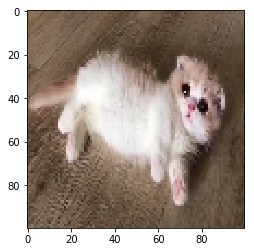

In [116]:
img = data_munchkin_init[0]
plt.imshow(img)
plt.show()


## データセットの水増しを行う関数  

### 回転及び反転を加える関数  


In [117]:
# 回転と反転を加える関数  
def get_augmented1(img):
    
    # 左右反転のノイズを加える
    if np.random.rand() >0.5:
        img = np.fliplr(img)
        
    # 左右のどちらかに最大30°回転させる  
    elif np.random.rand() <= 0.5:
        size = (img.shape[0],img.shape[1])
        # 画像の中心位置(x,y)
        center = (int(size[0]/2),int(size[1]/2))
        # 回転させたい角度  
        angle = np.random.randint(-30,30)
        # 拡大比率
        scale = 1.0
        # 回転変換行列の算出
        rotation_matrix = cv2.getRotationMatrix2D(center,angle,scale)
        img = cv2.warpAffine(img,rotation_matrix,size,flags=cv2.INTER_CUBIC)
        
    return np.array(img)

### 並進及び拡大縮小を行う関数  


In [118]:
# 並進及び拡大縮小を加える関数
def get_augmented2(img):
    
    if np.random.rand() > 0.5:
        # 変換後の画像のサイズを指定
        # 平滑化
        img = cv2.GaussianBlur(img,(7,7),0)
        
    elif np.random.rand() <= 0.5:
        # 画像サイズを一度拡大する
        zoomed_in = cv2.resize(img,None,fx=2.0,fy=2.0)
        
        # 変換前後のshapeを指定する
        height_1,width_1,channel_1 = img.shape
        height_2,width_2,channel_2 = zoomed_in.shape
        
        # x,y軸それぞれの切り取り開始点の決定
        # ピクセルの指定は整数になるようにする
        x = int((width_2 - width_1)/2)
        y = int((height_2 - height_1)/2)
        
        # 切り取リ開始点から元の画像分のサイズを切り取る
        img = zoomed_in[y:y+height_1,x:x+width_1]
                        
    return (img)

##  水増しの処理を行うための関数  

In [119]:
def process_image1(images):
    result = list()
    
    for image in images:
        
        augmented = get_augmented1(image)
        
        result.append(augmented.tolist())
    return np.array(result)


In [120]:
def process_image2(images):
    result =list()
    
    for image in images:
        
        augmented = get_augmented2(image)
        
        result.append(augmented.tolist())
    return np.array(result)

In [121]:
name_list

['americanshorthair', 'bengal', 'munchkin', 'persian', 'russianblue']

In [122]:
data_americanshorthair = np.append(data_americanshorthair_init,process_image1(data_americanshorthair_init),axis=0)


In [123]:
data_americanshorthair.shape

(984, 100, 100, 3)

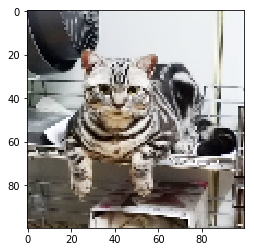

In [124]:
img = data_americanshorthair[870]
plt.imshow(img)
plt.show()

In [125]:
data_bengal = np.append(data_bengal_init,process_image1(data_bengal_init),axis=0)
data_munchkin = np.append(data_munchkin_init,process_image1(data_munchkin_init),axis=0)
data_persian = np.append(data_persian_init,process_image1(data_persian_init),axis=0)
data_russianblue = np.append(data_russianblue_init,process_image1(data_russianblue_init),axis=0)

In [126]:
data_americanshorthair = np.append(data_americanshorthair,process_image1(data_americanshorthair_init),axis=0)

In [127]:
data_bengal = np.append(data_bengal,process_image2(data_bengal_init),axis=0)
data_munchkin = np.append(data_munchkin,process_image2(data_munchkin_init),axis=0)
data_persian = np.append(data_persian,process_image2(data_persian_init),axis=0)
data_russianblue = np.append(data_russianblue,process_image2(data_russianblue_init),axis=0)

In [128]:
print("americanshorthair:",data_americanshorthair.shape)
print("bengal:",data_bengal.shape)
print("munchkin:",data_munchkin.shape)
print("persian:",data_persian.shape)
print("russianblue:",data_russianblue.shape)


americanshorthair: (1476, 100, 100, 3)
bengal: (1008, 100, 100, 3)
munchkin: (1188, 100, 100, 3)
persian: (1776, 100, 100, 3)
russianblue: (1515, 100, 100, 3)


In [129]:
data_americanshorthair.resize((1000,100,100,3))
data_bengal.resize((1000,100,100,3))
data_munchkin.resize((1000,100,100,3))
data_persian.resize((1000,100,100,3))
data_russianblue.resize((1000,100,100,3))

In [130]:
def data_split(name):
    all_index = np.arange(0,1000)
    random_index = np.random.choice(all_index,900,replace=False)
    random_index = random_index.astype("int64")
    random_index.dtype
    
    data = name
    
    train = []
    for i in range(len(random_index)):
        train.append(data[random_index[i]])

    test = []
    for i in range(len(all_index)):
        if all_index[i] not in random_index:
            test.append(data[all_index[i]])
        else:
            continue
    train = np.array(train)
    test = np.array(test)
    return train,test

In [131]:
train_americanshorthair,test_americanshorthair = data_split(data_americanshorthair)
train_bengal,test_bengal = data_split(data_bengal)
train_munchkin,test_munchkin = data_split(data_munchkin)
train_persian,test_persian = data_split(data_persian)
train_russianblue,test_russianblue = data_split(data_russianblue)

## 学習に際してデータを成形する

### 目的変数の設定

In [132]:
keys = ["persian","americanshorthair","munchkin","bengalcat","russianblue"]


In [133]:
y_label_persian = [1,0,0,0,0]
y_label_americanshorthair = [0,1,0,0,0]
y_label_munchkin = [0,0,1,0,0]
y_label_bengal = [0,0,0,1,0]
y_label_russianblue = [0,0,0,0,1]

### まずは学習データのラベル作成


In [134]:
y_label_train_persian = []
y_label_train_americanshorthair = []
y_label_train_munchkin = []
y_label_train_bengal = []
y_label_train_russianblue = []

In [135]:
y_label_train_persian.append([y_label_persian]*len(train_persian))
y_label_train_americanshorthair.append([y_label_americanshorthair]*len(train_americanshorthair))
y_label_train_munchkin.append([y_label_munchkin]*len(train_munchkin))
y_label_train_bengal.append([y_label_bengal]*len(train_bengal))
y_label_train_russianblue.append([y_label_russianblue]*len(train_russianblue))

In [136]:
y_label_train_persian = np.reshape(y_label_train_persian,(len(train_persian),5))
y_label_train_americanshorthair = np.reshape(y_label_train_americanshorthair,(len(train_americanshorthair),5))
y_label_train_munchkin = np.reshape(y_label_train_munchkin,(len(train_munchkin),5))
y_label_train_bengal = np.reshape(y_label_train_bengal,(len(train_bengal),5))
y_label_train_russianblue = np.reshape(y_label_train_russianblue,(len(train_russianblue),5))

In [137]:
y_label_train = np.concatenate([y_label_train_persian,y_label_train_americanshorthair,y_label_train_munchkin,y_label_train_bengal,y_label_train_russianblue],0)

In [138]:
y_label_train.shape

(4500, 5)

### 次にテストデータのラベル作成

In [139]:
y_label_test_persian = []
y_label_test_americanshorthair = []
y_label_test_munchkin = []
y_label_test_bengal = []
y_label_test_russianblue = []

In [140]:
y_label_test_persian.append([y_label_persian]*len(test_persian))
y_label_test_americanshorthair.append([y_label_americanshorthair]*len(test_americanshorthair))
y_label_test_munchkin.append([y_label_munchkin]*len(test_munchkin))
y_label_test_bengal.append([y_label_bengal]*len(test_bengal))
y_label_test_russianblue.append([y_label_russianblue]*len(test_russianblue))

In [141]:
y_label_test_persian = np.reshape(y_label_test_persian,(len(test_persian),5))
y_label_test_americanshorthair = np.reshape(y_label_test_americanshorthair,(len(test_americanshorthair),5))
y_label_test_munchkin = np.reshape(y_label_test_munchkin,(len(test_munchkin),5))
y_label_test_bengal = np.reshape(y_label_test_bengal,(len(test_bengal),5))
y_label_test_russianblue = np.reshape(y_label_test_russianblue,(len(test_russianblue),5))

In [142]:
y_label_test = np.concatenate([y_label_test_persian,y_label_test_americanshorthair,y_label_test_munchkin,y_label_test_bengal,y_label_test_russianblue],0)

In [143]:
y_label_test.shape

(500, 5)

### 学習データとテストデータを成形する

In [144]:
# 学習データ
train_data = np.concatenate([train_persian,train_americanshorthair,train_munchkin,train_bengal,train_russianblue],0)

In [145]:
# テストデータ
test_data = np.concatenate([test_persian,test_americanshorthair,test_munchkin,test_bengal,test_russianblue],0)

In [146]:
def show_train_sample_info(index):
    img = train_data[index]
    
    plt.imshow(img)
    plt.show()
    
    label = y_label_train[index].argmax()
    print(keys[label])

In [147]:
train_data.shape

(4500, 100, 100, 3)

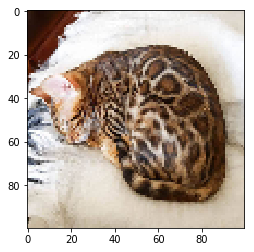

bengalcat


In [148]:
show_train_sample_info(2801)

## データセットのpickle化  
---  


In [149]:
# モジュールのインポート
import pickle

## シリアライズ化  
---  

In [150]:
#trainデータのシリアライズ化
with open("train_data.binaryfile","wb") as train_data_pickle:
    pickle.dump(train_data,train_data_pickle,protocol=4)

In [153]:
#trainデータラベルのシリアライズ化  
with open("train_data_label.binaryfile","wb") as train_data_label_pickle:
    pickle.dump(y_label_train,train_data_label_pickle)

In [160]:
#testデータのシリアライズ化
with open("test_data.binaryfile","wb") as test_data_pickle:
    pickle.dump(test_data,test_data_pickle,protocol=4)

In [163]:
#testデータラベルのシリアライズ化
with open("test_data_label.binaryfile","wb") as test_data_label_pickle:
    pickle.dump(y_label_test,test_data_label_pickle)

## デシリアライズ化  
---  

In [154]:
#trainデータのデシリアライズ化
with open("train_data.binaryfile","rb") as train_data_unpickle:
    train_data = pickle.load(train_data_unpickle)

In [156]:
#trainデータラベルのデシリアライズ化
with open("train_data_label.binaryfile","rb") as train_data_label_unpickle:
    y_label_train = pickle.load(train_data_label_unpickle)

In [161]:
#testデータのデシリアライズ化
with open("test_data.binaryfile","rb") as test_data_unpickle:
    test_data = pickle.load(test_data_unpickle)

In [164]:
#testデータラベルのデシリアライズ化　
with open("test_data_label.binaryfile","rb") as test_data_label_unpickle:
    y_label_test = pickle.load(test_data_label_unpickle)

In [167]:
print("train_data shape:",train_data.shape)
print("train_label:",y_label_train.shape)
print("test_data shape:",test_data.shape)
print("test_label:",y_label_test.shape)

train_data shape: (4500, 100, 100, 3)
train_label: (4500, 5)
test_data shape: (500, 100, 100, 3)
test_label: (500, 5)


## 学習モデル  

In [2]:
import keras
# 層構造のモデルを定義するためのメソッド
from keras.models import Sequential
# Denseは層の生成メソッド、Activationは活性化関数を定義するためのメソッド
from keras.layers import Dense, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import Flatten
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [169]:
# モデルの定義

#-----------
# CNNモデル
#-----------

model = Sequential()

model.add(Conv2D(filters=64, input_shape=(100, 100, 3), kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4,4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

In [170]:
# 同様に学習前にコンパイルします。
model.compile(loss='categorical_crossentropy',
              optimizer="Adam", 
              metrics=['accuracy'])

# ミニバッチに含まれるサンプル数を指定
batch_size = 225

# epoch数を指定
n_epoch = 20

In [171]:
# earlystoppingの適用
es = EarlyStopping(monitor="val_loss",patience=5,verbose=0,mode="min")

In [172]:
# 学習を開始します。
hist = model.fit(train_data,
                 y_label_train,
                 epochs=n_epoch,
                 validation_data=(test_data, y_label_test),
                 verbose=1,
                 batch_size=batch_size)

Train on 4500 samples, validate on 500 samples
Epoch 1/20
4500/4500 [==============================] - 95s 21ms/step - loss: 1.7773 - accuracy: 0.2298 - val_loss: 1.5428 - val_accuracy: 0.2580
Epoch 2/20
4500/4500 [==============================] - 95s 21ms/step - loss: 1.4146 - accuracy: 0.3716 - val_loss: 1.3273 - val_accuracy: 0.4420
Epoch 3/20
4500/4500 [==============================] - 95s 21ms/step - loss: 1.2791 - accuracy: 0.4749 - val_loss: 1.2699 - val_accuracy: 0.4580
Epoch 4/20
4500/4500 [==============================] - 92s 21ms/step - loss: 1.1549 - accuracy: 0.5351 - val_loss: 1.2361 - val_accuracy: 0.5200
Epoch 5/20
4500/4500 [==============================] - 92s 20ms/step - loss: 1.0569 - accuracy: 0.5780 - val_loss: 1.0619 - val_accuracy: 0.5640
Epoch 6/20
4500/4500 [==============================] - 95s 21ms/step - loss: 0.9265 - accuracy: 0.6373 - val_loss: 1.0442 - val_accuracy: 0.5840
Epoch 7/20
4500/4500 [==============================] - 90s 20ms/step - loss:

## 学習データの保存

In [173]:
# 学習データの保存
model_json_str = model.to_json()
open("cat_CNN_model.json","w").write(model_json_str)
model.save_weights("cat_CNN_result.h5")

## 学習させたモデルで予測

In [181]:
# testデータのサンプルについて情報を確認する関数
# (testデータのindex)
def show_test_sample_info(index):
    img = test_data[index]
    
    # 画像を出力
    plt.imshow(img)
    plt.show()
    print("test_data label:" ,keys[np.argmax(y_label_test[index])])

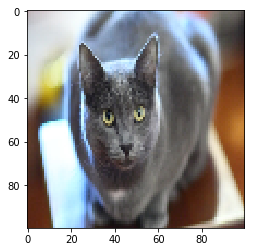

test_data label: russianblue
正解です｡


In [238]:
# indexを指定
index = 483

# 画像を出力
show_test_sample_info(index)

# 指定のindexが与えられたtestデータについて確認
pred = model.predict(test_data[index].reshape(1, 100, 100, 3)).argmax()
# 正解か不正解かを出力
if pred == np.argmax(y_label_test[index]):
    print('正解です｡')
else:
    print('間違いです｡')
    print("predict type:",keys[pred])

## 学習データを利用した判定  

In [3]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import img_to_array,load_img
from keras.models import model_from_json
import cv2
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [4]:
test_img = "test3.jpg"

In [5]:

model_weight = "cat_CNN_result.h5"
model_name = "cat_CNN_model.json"

In [6]:
model = model_from_json(open(model_name).read())

In [43]:
model.load_weights(model_weight)

In [7]:
img = cv2.imread("./test/unknown/"+str(test_img))
clear_img = cv2.resize(img,(320,320))
clear_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(100,100))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [8]:
img = img.astype(float)

In [9]:
img /= 255.0

In [10]:
clear_img = clear_img.astype(float)
clear_img /= 255.0

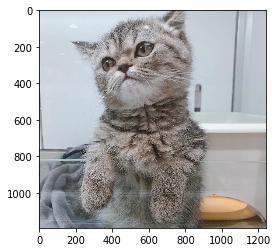

In [11]:
plt.imshow(clear_img)
plt.show()

In [12]:
keys = ["persian","americanshorthair","munchkin","bengalcat","russianblue"]

In [18]:
pred = model.predict(img.reshape(1, 100, 100, 3)).argmax()
print("predict type:",keys[pred])

predict type: bengalcat


In [36]:
value = model.predict(img.reshape(1,100,100,3))


1.0

In [33]:

pred_sort = model.predict(img.reshape(1,100,100,3)).argsort()
pred_sort = pred_sort.flatten()
pred_sort
print("first predict type:",keys[pred_sort[4]])
print("second predict type:",keys[pred_sort[3]])

first predict type: bengalcat
second predict type: munchkin
